<a href="https://colab.research.google.com/github/TMhdSofyan/Convergence_Analysis/blob/main/Polynomial_Chaos_Expansion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Data/Experimental_Design2.csv')
df.tail()

,ID,Generator,Status,Result Status,Proxy Role,Keep SR3,Has SR3,Rating,CCPOR,KRG,...,PERMK_MULTI,POR_MULTI,SORW,Cum_Oil,Cum_Gas,Execution Node,Dataset Path,Optimal,MCMC Count,Comment
17072,17072,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.531235,...,1.159760,0.997680,0.100961,1643914.0,317224130.0,77-1134-41,SA.cmsd\SA_17072.dat,False,0,NaN
17073,17073,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.499895,...,0.870061,1.156218,0.108906,1661441.1,330066270.0,77-1134-41,SA.cmsd\SA_17073.dat,False,0,NaN
17074,17074,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.509262,...,0.960209,0.982429,0.100172,1584137.9,315742180.0,77-1134-41,SA.cmsd\SA_17074.dat,False,0,NaN
17075,17075,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.504134,...,1.041308,1.062378,0.090308,1632599.6,327702820.0,77-1134-41,SA.cmsd\SA_17075.dat,False,0,NaN
17076,17076,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.431177,...,1.219194,1.158148,0.097388,1668201.6,328796160.0,77-1134-41,SA.cmsd\SA_17076.dat,False,0,NaN


In [4]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [5]:
!pip3 install UQpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 kB 9.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=ebe43f9faa48ffe537e6ae01eae713876dd24d87c68496f679068bc3ccffc747
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [6]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [7]:
df2 = df.drop(columns = ['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating','KRG', 'KRO', 'KRW', 'NG', 'NW','PERMK_MULTI', 'SORW', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'])
df2.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil
0,0.000005,1.001000,1.001000,1641502.0
1,0.000004,1.047771,1.100369,1658139.5
2,0.000004,1.021748,0.986743,1638181.8
3,0.000003,1.085006,0.985052,1637746.9
4,0.000005,0.893916,1.116380,1642039.0


In [50]:
first_1000 = df2.head(100)
X = first_1000.drop(columns="Cum_Oil").to_numpy()
y = first_1000.Cum_Oil.to_numpy()

In [54]:
X.shape

(100, 3)

In [55]:
y

array([1641502. , 1658139.5, 1638181.8, 1637746.9, 1642039. , 1643717.4,
       1655225.8, 1648534.3, 1580876.5, 1612149.5, 1651127.6, 1657736.9,
       1648434.1, 1620649.8, 1597741.3, 1637607.4, 1633578.8, 1671130. ,
       1633316.1, 1628004.9, 1648828.8, 1647589.3, 1623170.6, 1622766.6,
       1591752.8, 1595351.6, 1632457.8, 1630450. , 1635968.9, 1665459.8,
       1627404.9, 1661058. , 1588380. , 1638499.8, 1637566. , 1662652.4,
       1652195.1, 1637508.1, 1626611. , 1629242.3, 1651163. , 1641375. ,
       1633874.4, 1635672.9, 1619991.9, 1654373.4, 1655188.1, 1630664.9,
       1651584.4, 1662198.1, 1632719.9, 1618907.3, 1632368.3, 1598667.4,
       1645383.4, 1607628.8, 1598181.3, 1619018.5, 1643182.9, 1636174.5,
       1664451.6, 1584142.9, 1603530.9, 1663903.8, 1649015.8, 1647225.3,
       1610777.3, 1600663.8, 1631384.8, 1571254.6, 1647346. , 1638869.4,
       1673400. , 1623496.9, 1659005.6, 1610355.5, 1614475.3, 1672096.3,
       1595829.5, 1624273.6, 1646633.8, 1653613.4, 

In [47]:
from UQpy.distributions import Uniform, Normal, JointIndependent
from UQpy.surrogates import *

In [56]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [57]:
# Define the maximum degree for the polynomial basis
max_degree = 5

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [58]:
moments=pce.get_moments()
moments

(1634539.3647721023, 635161121.9053402)

In [59]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.63453936e+06]
 [ 3.24666061e+03]
 [ 1.39338283e+04]
 [ 1.79142394e+04]
 [-2.37519586e+03]
 [-1.03672933e+03]
 [-5.93855243e+03]
 [-8.45927117e+02]
 [ 2.48922523e+02]
 [ 2.60653089e+02]
 [-3.87804782e+02]
 [-1.28678442e+03]
 [ 1.60093413e+03]
 [ 4.54474774e+02]
 [ 1.69887026e+03]
 [-1.85243501e+03]
 [ 7.77156572e+01]
 [ 1.71612176e+02]
 [ 1.75719343e+02]
 [-3.58734725e+03]
 [ 1.40913651e+03]
 [-1.54449766e+03]
 [ 1.09726962e+03]
 [-8.79419607e+02]
 [-3.47743077e+02]
 [ 8.58887345e+02]
 [-1.17180702e+03]
 [ 2.14797734e+02]
 [ 2.29758415e+02]
 [ 4.89626931e+02]
 [-1.79341428e+02]
 [ 1.56188652e+02]
 [-5.83765195e+02]
 [ 2.72200618e+02]
 [-1.35340372e+01]
 [-3.65807563e+02]
 [-2.32356955e+02]
 [ 4.36821109e+02]
 [-1.56074001e+03]
 [ 2.06816491e+03]
 [-1.26934182e+03]
 [ 6.55242023e+02]
 [-2.29431055e+03]
 [ 1.17518813e+03]
 [-7.28048026e+02]
 [-6.07912660e+02]
 [-4.46763973e+02]
 [ 6.49139933e+02]
 [-9.55218473e+02]
 [ 1.65927062e+03]
 [ 2.39627349e+02]
 [ 6.16844367

In [60]:
Test_Data = df2.tail(16976)
X_test = Test_Data.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [61]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data['Cum_Oil_PCE'] = y_test

Test_Data.tail()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
17072,0.000005,1.002530,0.997680,1643914.0,1.642385e+06
17073,0.000004,1.020072,1.156218,1661441.1,1.661599e+06
17074,0.000004,0.787814,0.982429,1584137.9,1.584173e+06
17075,0.000005,0.881290,1.062378,1632599.6,1.630937e+06
17076,0.000005,1.074085,1.158148,1668201.6,1.667524e+06


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data)

# Predict on training and test sets
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0009741885403556647


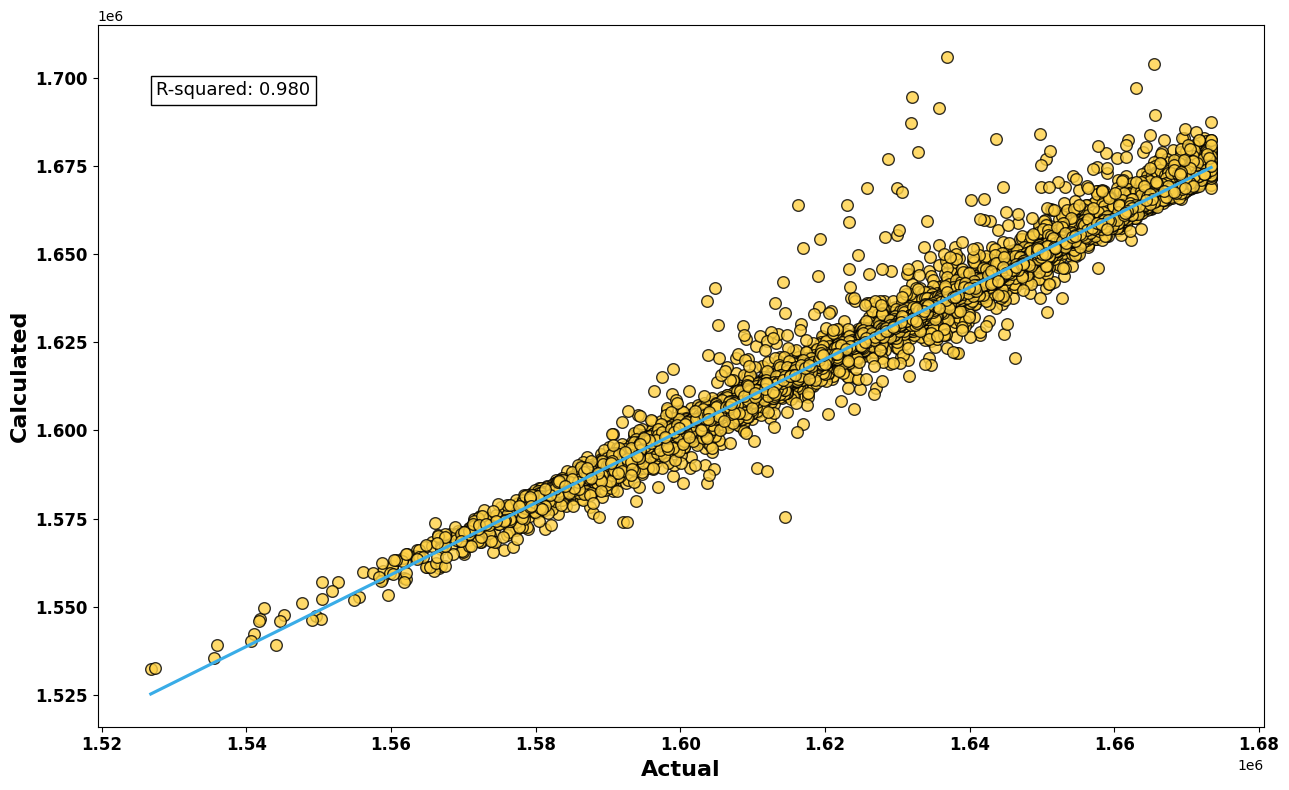

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot, scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'}, line_kws={'color': '#39ACE7'})
#plt.title('Test Set - Actual vs. Predicted (PCE)')
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
plt.show()

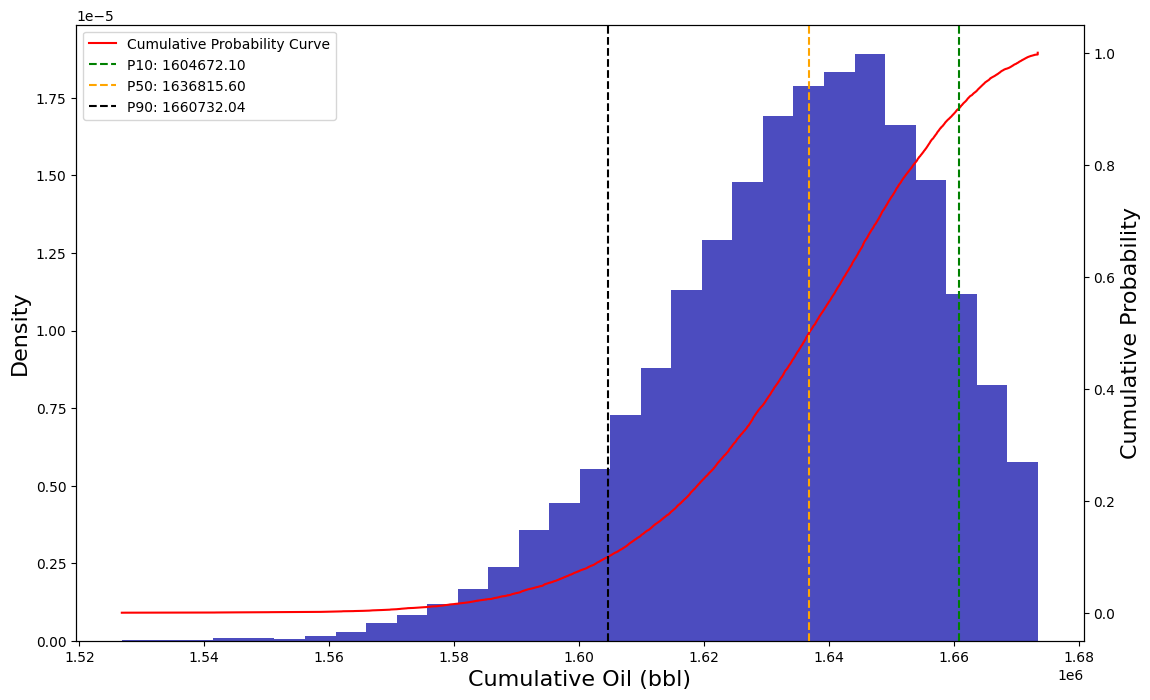

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.7, color='#0000a5', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16)  # Adjust the font size here
plt.ylabel('Density', fontsize=16)  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here

plt.grid(False)

# Cumulative probability curve
sorted_cum_oil = np.sort(df['Cum_Oil'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(df['Cum_Oil'], 10)
p50 = np.percentile(df['Cum_Oil'], 50)
p10 = np.percentile(df['Cum_Oil'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Cumulative.png', dpi=600)
plt.show()

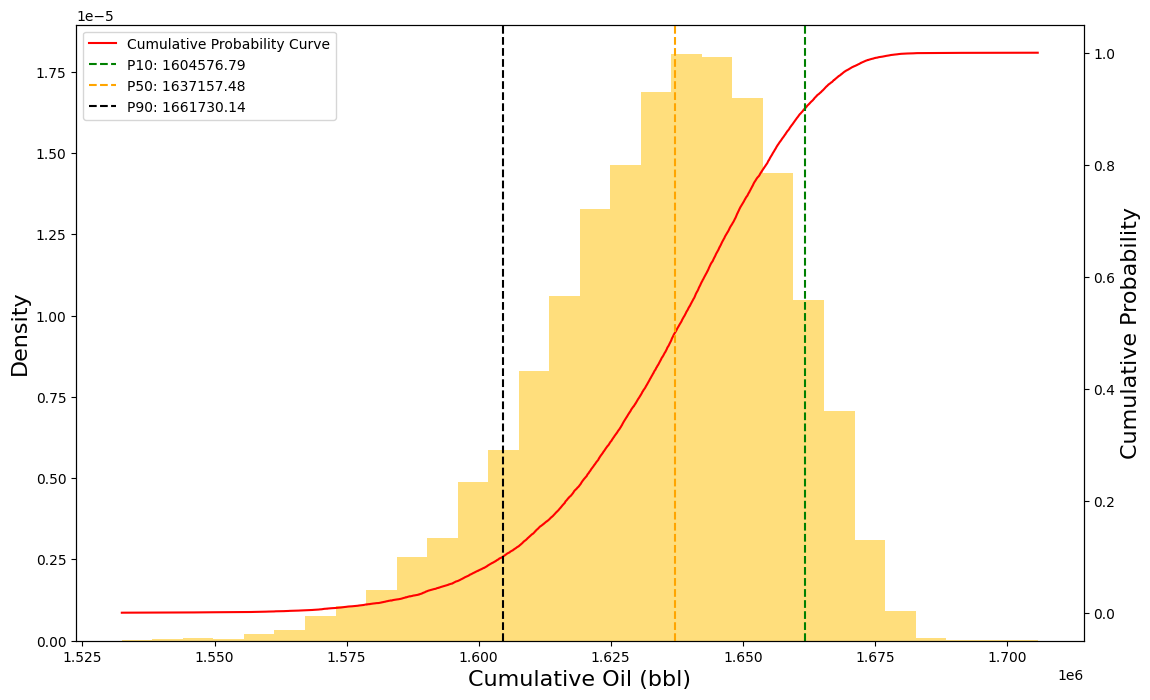

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))
plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16)  # Adjust the font size here
plt.ylabel('Density', fontsize=16)  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here

plt.grid(False)

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Cumulative.png', dpi=600)
plt.show()

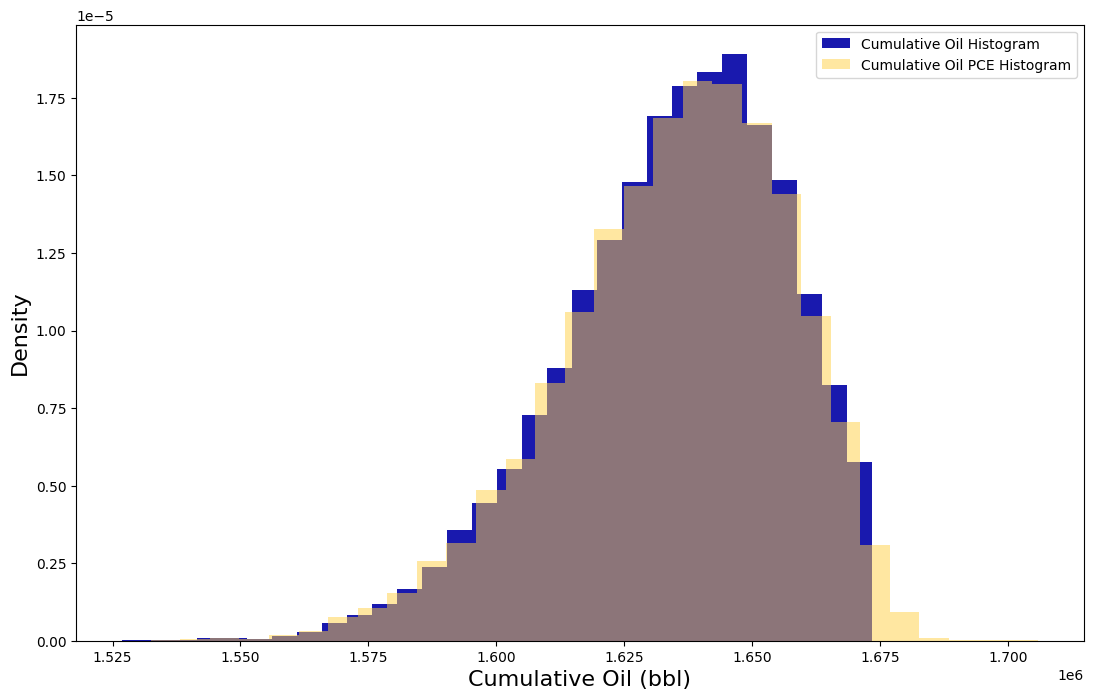

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Cumulative Oil Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='Cumulative Oil PCE Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Show the plot
plt.show()
